# Getting started
I need to create a model that will be more accurate than compilation of experts' projections. In order to do that, I need to get the data for the 2015 season along with 2015's preseason projections made by the experts. My goal would be to use the stats from previous season to beat the accuracy score of the experts' projections. My models will be segmented by each positions and perform different regression models such as linear, Lasso, random forest, and few other models for each positions.

The current risk I foresee is that some players will get injured, suspended, or retire. Also, I don't have any data on any rookie players. The age needs to be considered. Since players are humans, they cannot perform exactly the same every season.


In [733]:
import requests
import bs4
from bs4 import BeautifulSoup
import urllib2
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#function that will group rows together
def group(iterator, count):
    itr = iter(iterator)
    while True:
        yield tuple([itr.next() for i in range(count)])


# Data Mining for 2015 preseason projections


In [734]:
#scraping the 2015 QB projection page from fantasypros
soupQB = BeautifulSoup(requests.get('https://www.fantasypros.com/nfl/projections/qb.php?year=2015&week=draft').text)

#find the body of the table
data_QB = soupQB('table')[0].findAll('tbody')[0].text.strip().split()

#list of team initials for the entire NFL teams
teamList = ['NE','NYJ','MIA','BUF','PIT','BAL','CLE','CIN','HOU','IND',
            'JAC','TEN','DEN','KC','SD','OAK','DAL','WAS','NYG','PHI',
            'MIN','GB','DET','CHI','NO','TB','ATL','CAR','SF','SEA','ARI','STL','LA']

#get rid of the teams
data_QB_noTeam = [i for i in data_QB if i not in teamList]

#recreate the table from the website into pandas dataframe
dfQB = pd.DataFrame(list(group(data_QB_noTeam, 12)))

#join first name and last name together into the same column
dfQB[0] = dfQB[[0,1]].apply(lambda x: ' '.join(x),axis=1)

#drop the last name column
del dfQB[1]

#insert a column for the type of position. For this table, QB.

dfQB.insert(1, 'Position', 'QB')

#column name for this table
column_QB = ['Player','Position','Pass_Attempt','Pass_Completion','Pass_Yards','Pass_Touchdowns','Interceptions',
                 'Rush_Attempt','Rush_Yards','Rush_Touchdowns','Fumbles_Lost','Fantasy_Points']

#set the columns
dfQB.columns = column_QB

dfQB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
Player             76 non-null object
Position           76 non-null object
Pass_Attempt       76 non-null object
Pass_Completion    76 non-null object
Pass_Yards         76 non-null object
Pass_Touchdowns    76 non-null object
Interceptions      76 non-null object
Rush_Attempt       76 non-null object
Rush_Yards         76 non-null object
Rush_Touchdowns    76 non-null object
Fumbles_Lost       76 non-null object
Fantasy_Points     76 non-null object
dtypes: object(12)
memory usage: 7.2+ KB


In [735]:
#scraping the 2015 RB projection page from fantasypros
soupRB = BeautifulSoup(requests.get('https://www.fantasypros.com/nfl/projections/rb.php?year=2015&week=draft').text)

data_RB = soupRB('table')[0].findAll('tbody')[0].text.strip().split()

data_RB_noTeam = [i for i in data_RB if i not in teamList]

dfRB = pd.DataFrame(list(group(data_RB_noTeam, 10)))

dfRB[0] = dfRB[[0,1]].apply(lambda x: ' '.join(x),axis=1)

del dfRB[1]

dfRB.insert(1, 'Position', 'RB')

column_RB = ['Player','Position','Rush_Attempt','Rush_Yards','Rush_Touchdowns','Rec','Receive_Yards','Receive_Touchdowns',
             'Fumbles_Lost','Fantasy_Points']

dfRB.columns = column_RB

dfRB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 10 columns):
Player                152 non-null object
Position              152 non-null object
Rush_Attempt          152 non-null object
Rush_Yards            152 non-null object
Rush_Touchdowns       152 non-null object
Rec                   152 non-null object
Receive_Yards         152 non-null object
Receive_Touchdowns    152 non-null object
Fumbles_Lost          152 non-null object
Fantasy_Points        152 non-null object
dtypes: object(10)
memory usage: 11.9+ KB


In [736]:
#scraping the RB page
soupWR = BeautifulSoup(requests.get('https://www.fantasypros.com/nfl/projections/wr.php?year=2015&week=draft').text)

data_WR = soupWR('table')[0].findAll('tbody')[0].text.strip().split()

data_WR_noTeam = [i for i in data_WR if i not in teamList]

dfWR = pd.DataFrame(list(group(data_WR_noTeam, 10)))

dfWR[0] = dfWR[[0,1]].apply(lambda x: ' '.join(x),axis=1)

del dfWR[1]

dfWR.insert(1, 'Position', 'WR')

column_WR = ['Player','Position','Rush_Attempt','Rush_Yards','Rush_Touchdowns','Rec','Receive_Yards','Receive_Touchdowns',
             'Fumbles_Lost','Fantasy_Points']

dfWR.columns = column_WR

dfWR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 10 columns):
Player                163 non-null object
Position              163 non-null object
Rush_Attempt          163 non-null object
Rush_Yards            163 non-null object
Rush_Touchdowns       163 non-null object
Rec                   163 non-null object
Receive_Yards         163 non-null object
Receive_Touchdowns    163 non-null object
Fumbles_Lost          163 non-null object
Fantasy_Points        163 non-null object
dtypes: object(10)
memory usage: 12.8+ KB


In [737]:
#scraping the TE page
soupTE = BeautifulSoup(requests.get('https://www.fantasypros.com/nfl/projections/te.php?year=2015&week=draft').text)

data_TE = soupTE('table')[0].findAll('tbody')[0].text.strip().split()

data_TE_noTeam = [i for i in data_TE if i not in teamList]

dfTE = pd.DataFrame(list(group(data_TE_noTeam, 7)))

dfTE[0] = dfTE[[0,1]].apply(lambda x: ' '.join(x),axis=1)

del dfTE[1]

dfTE.insert(1, 'Position', 'TE')

column_TE = ['Player','Position','Rec','Receive_Yards','Receive_Touchdowns','Fumbles_Lost','Fantasy_Points']

dfTE.columns = column_TE

dfTE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
Player                95 non-null object
Position              95 non-null object
Rec                   95 non-null object
Receive_Yards         95 non-null object
Receive_Touchdowns    95 non-null object
Fumbles_Lost          95 non-null object
Fantasy_Points        95 non-null object
dtypes: object(7)
memory usage: 5.3+ KB


In [738]:
#scraping the Kickers page
soupK = BeautifulSoup(requests.get('https://www.fantasypros.com/nfl/projections/k.php?year=2015&week=draft').text)

data_K = soupK('table')[0].findAll('tbody')[0].text.strip().split()

data_K_noTeam = [i for i in data_K if i not in teamList]

dfK = pd.DataFrame(list(group(data_K_noTeam, 6)))

dfK[0] = dfK[[0,1]].apply(lambda x: ' '.join(x),axis=1)

del dfK[1]

dfK.insert(1, 'Position', 'K')

column_K = ['Player','Position','FGM','FGA','Fumbles_Lost','Fantasy_Points']

dfK.columns = column_K

dfK.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
Player            32 non-null object
Position          32 non-null object
FGM               32 non-null object
FGA               32 non-null object
Fumbles_Lost      32 non-null object
Fantasy_Points    32 non-null object
dtypes: object(6)
memory usage: 1.6+ KB



| Columns | Descriptions| Type
|------|------|------|
|Player| First and Last name of players| Categorical|
|Position| Position of players| Categorical|
|Pass_Attempt| number of attempts by passing| Discrete/integer|
|Pass_Completion| number of completions by passing| Discrete/integer|
|Pass_Yards| number of yards by passing|Discrete/integer|
|Pass_Touchdowns| number of touchdowns by passing |Discrete/integer|
|Interceptions| number of interceptions|Discrete/integer|
|Rush_Attempt| number of rush attempts|Discrete/integer|
|Rush_Yards| number of yards by rushing|Discrete/integer|
|Rush_Touchdowns| number of touchdowns by rushing|Discrete/integer|
|Fumbles_Lost| number of fumbles|Discrete/integer|
|Fantasy_Points| total fantasy points|Continuous/float|
|Rec| number of receptions|Discrete/integer|
|Receive_Yards| number of yards by reception|Discrete/integer|
|Receive_Touchdowns| number of touchdowns by reception|Discrete/integer|
|FGM| Field Goals Made|Discrete/integer|
|FGA| Field Goal Attempts|Discrete/integer|


# Data Mining for 2015 Actual Results

In [739]:
#actual fantasy points
soup_results = BeautifulSoup(requests.get('https://www.fantasypros.com/nfl/reports/leaders/').text)

data_results = [i.text for i in soup_results('table')[0].findAll('td')]

column_results = ['Rank','Player', 'Team','Position','Total_Points','Games_Played','Avg_Points']
dfResults = pd.DataFrame(list(group(data_results,7)),columns=column_results)
dfResults.head()

,Rank,Player,Team,Position,Total_Points,Games_Played,Avg_Points
0,1,Cam Newton,CAR,QB,389.1,16,24.3
1,2,Tom Brady,NE,QB,343.7,16,21.5
2,3,Russell Wilson,SEA,QB,336.4,16,21.0
3,4,Blake Bortles,JAC,QB,316.1,16,19.8
4,5,Carson Palmer,ARI,QB,309.2,16,19.3


# Setting up Postgresql Database

In [740]:
#!brew install postgresql
#!brew services stop postgresql
#!brew services start postgresql
#!createdb fantasyfootball


In [741]:
#create an engine for localhost
engine = create_engine('postgresql://:@localhost:5432/fantasyfootball')

#lowercase all column names
dfQB.columns = [c.lower() for c in dfQB.columns]
dfRB.columns = [c.lower() for c in dfRB.columns]
dfWR.columns = [c.lower() for c in dfWR.columns]
dfTE.columns = [c.lower() for c in dfTE.columns]
dfK.columns = [c.lower() for c in dfK.columns]
dfResults.columns = [c.lower() for c in dfResults.columns]

#write data frames to their own tables
#dfQB.to_sql("qb", engine)
#dfRB.to_sql("rb", engine)
#dfWR.to_sql("wr", engine)
#dfTE.to_sql("te", engine)
#dfK.to_sql("k", engine)
#dfResults.to_sql('results',engine)

#connect to the engine
connection = engine.connect()

#query the player name, team they were on, and projected fantasy points
joinedQB = pd.read_sql("""
                        SELECT results.player,results.team,qb.postion,qb.fantasy_points
                        FROM results
                        JOIN qb 
                        ON results.player=qb.player
                        ;""",con=engine)

joinedRB = pd.read_sql("""
                        SELECT results.player,results.team,rb.postion,rb.fantasy_points
                        FROM results
                        JOIN rb 
                        ON results.player=rb.player
                        ;""",con=engine)

joinedWR = pd.read_sql("""
                        SELECT results.player,results.team,wr.postion,wr.fantasy_points
                        FROM results
                        JOIN wr 
                        ON results.player=wr.player
                        ;""",con=engine)

joinedTE = pd.read_sql("""
                        SELECT results.player,results.team,te.postion,te.fantasy_points
                        FROM results
                        JOIN te 
                        ON results.player=te.player
                        ;""",con=engine)

joinedK = pd.read_sql("""
                        SELECT results.player,results.team,k.postion, k.fantasy_points
                        FROM results
                        JOIN k 
                        ON results.player=k.player
                        ;""",con=engine)

#concatenate the tables into one big table
frames = [joinedQB, joinedRB, joinedWR, joinedTE, joinedK]

finalFrame = pd.concat(frames)
finalFrame.head()


,player,team,postion,fantasy_points
0,Cam Newton,CAR,QB,278.9
1,Tom Brady,NE,QB,281.2
2,Russell Wilson,SEA,QB,303.2
3,Blake Bortles,JAC,QB,205.5
4,Carson Palmer,ARI,QB,232.8


In [742]:
#drop names that doesn't exist in the other table and drop duplicates
somethingNew = (dfResults.loc[dfResults['player'].isin(finalFrame['player'])])
somethingNew = somethingNew.drop_duplicates(['player'],keep='last')

somethingWeird = (finalFrame.loc[finalFrame['player'].isin(dfResults['player'])])
somethingWeird = somethingWeird.drop_duplicates(['player'], keep='last')
somethingWeird['fantasy_points'] = somethingWeird['fantasy_points'].astype(float)

#join on the name of players, clean columns, rename some columns
newDF = pd.merge(somethingNew, somethingWeird, on='player')
newDF.drop(['rank','avg_points','team_y'],axis=1,inplace=True)
newDF = newDF[['player','team_x','position','games_played','total_points','fantasy_points']]
newDF = newDF.rename(index=str, columns={"team_x": "team", "total_points": "actual","fantasy_points":"projected"})

newDF.head()

,player,team,position,games_played,actual,projected
0,Cam Newton,CAR,QB,16,389.1,278.9
1,Tom Brady,NE,QB,16,343.7,281.2
2,Russell Wilson,SEA,QB,16,336.4,303.2
3,Blake Bortles,JAC,QB,16,316.1,205.5
4,Carson Palmer,ARI,QB,16,309.2,232.8


# Projected vs Actual from the experts

R-squared: 0.600625723793


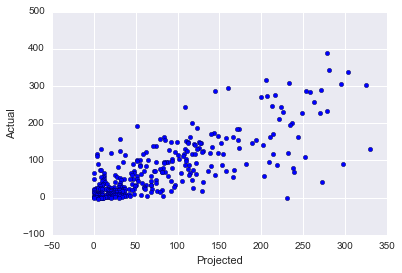

In [743]:
#plot projected vs actual
x = newDF.projected.tolist()
y = newDF.actual.tolist()
plt.scatter(x,y)
plt.xlabel('Projected')
plt.ylabel('Actual')

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(newDF['projected'].astype(float),newDF['actual'].astype(float))
print"R-squared:", r_value**2

# Data Mining for 2014 results

In [744]:
URLQB1 = "http://fftoday.com/stats/playerstats.php?Season=2014&GameWeek=Season&PosID=10&LeagueID=10"
URLQB2 = "http://fftoday.com/stats/playerstats.php?Season=2014&GameWeek=Season&PosID=10&LeagueID=1&order_by=FFPts&sort_order=DESC&cur_page=1"

#parse the page
soupQB1 = BeautifulSoup(requests.get(URLQB1).text)
soupQB2 = BeautifulSoup(requests.get(URLQB2).text)

#get the data from the first page
QB1_data = [[i for i in soupQB1('table')[9].findAll('tr')[0]('tr')[i].text.split()[1:]] 
               for i in range(len(soupQB1('table')[9].findAll('tr')[0]('tr')))]
columnNames = ['First','Last','Team','Games','Comp_P','Att_P','Yards_P','TD_P','INT','ATT_R','Yards_R','TD_R','FPTs','FPTs/G','d']


dfQB12014 = pd.DataFrame(QB1_data[2:],columns=columnNames)

#merge first name and last name into one column
dfQB12014['First'] = dfQB12014[[0,1]].apply(lambda x: ' '.join(x),axis=1)
del dfQB12014['d']
del dfQB12014['Last']

#get the data from the second page
QB2_data = [[i for i in soupQB2('table')[9].findAll('tr')[0]('tr')[i].text.split()[1:]] 
               for i in range(len(soupQB2('table')[9].findAll('tr')[0]('tr')))]

columnNames = ['First','Last','Team','Games','Comp_P','Att_P','Yards_P','TD_P','INT','ATT_R','Yards_R','TD_R','FPTs','FPTs/G']

#merge first name and last name into one column
dfQB22014 = pd.DataFrame(QB2_data[2:],columns=columnNames)
dfQB22014['First'] = dfQB22014[[0,1]].apply(lambda x: ' '.join(x),axis=1)
del dfQB22014['Last']

#put both tables together
dfQB2014 = pd.concat([dfQB12014,dfQB22014])
dfQB2014.rename(columns={'First': 'Player'}, inplace=True)

#strip the commas
dfQB2014['Yards_P'] = dfQB2014['Yards_P'].str.replace(',', '')

#convert objects into numeric(integers or floats)
dfQB2014 = dfQB2014.convert_objects(convert_numeric=True)

#add a new column for completion rate, total yards, total touchdowns, yards per completions
dfQB2014['Comp_Rate'] = dfQB2014['Comp_P']/dfQB2014['Att_P']
dfQB2014['Total_Yards'] = dfQB2014['Yards_P'] + dfQB2014['Yards_R']
dfQB2014['Total_TD'] = dfQB2014['TD_P'] + dfQB2014['TD_R']
dfQB2014['Total_Yards_perComp'] = dfQB2014['Total_Yards']/dfQB2014['Comp_P']

dfQB2014.head()

/Users/SangYeob/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Player,Team,Games,Comp_P,Att_P,Yards_P,TD_P,INT,ATT_R,Yards_R,TD_R,FPTs,FPTs/G,Comp_Rate,Total_Yards,Total_TD,Total_Yards_perComp
0,Andrew Luck,IND,16.0,380,616,4761,40.0,16,64,263,3,442.4,27.6,0.616883,5024,43.0,13.221053
1,Aaron Rodgers,GB,16.0,341,520,4381,38.0,5,43,269,2,410.0,25.6,0.655769,4650,40.0,13.636364
2,Drew Brees,NO,16.0,456,659,4952,33.0,17,27,68,1,392.4,24.5,0.691958,5020,34.0,11.008772
3,Peyton Manning,DEN,16.0,395,597,4727,39.0,15,24,-24,0,390.0,24.4,0.661642,4703,39.0,11.906329
4,Ben Roethlisberger,PIT,16.0,408,608,4952,32.0,9,32,27,0,378.3,23.6,0.671053,4979,32.0,12.203431


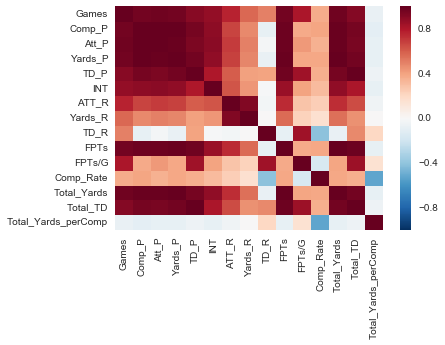

In [745]:
sns.heatmap(dfQB2014.corr())

# Building a simple model

somethingNew = (dfResults.loc[dfResults['player'].isin(finalFrame['player'])])
somethingNew = somethingNew.drop_duplicates(['player'],keep='last')

dfQB2014 = somethingNew.loc[somethingNew['player'].isin(dfQB2014['Player'])]
dfQB2014.head()
print len(dfQB2014)

somethingNew1 = dfQB2014.loc[dfQB2014['player'].isin(somethingNew['player'])]
print len(somethingNew1)

In [746]:
dfQB2014.rename(columns={'Player': 'player'}, inplace=True)

In [747]:
resultQB = pd.merge(dfQB2014, somethingNew, on='player')

In [748]:
resultQB.drop(['team','position','games_played','avg_points'],inplace=True,axis=1)


/Users/SangYeob/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/SangYeob/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


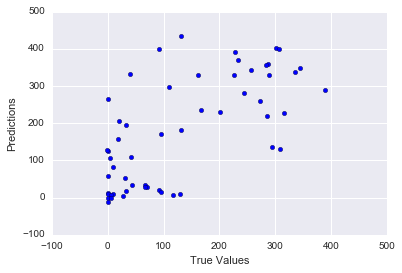

Mean Square Error: 255.58
R2 value for Lin Reg: 0.310893


/Users/SangYeob/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


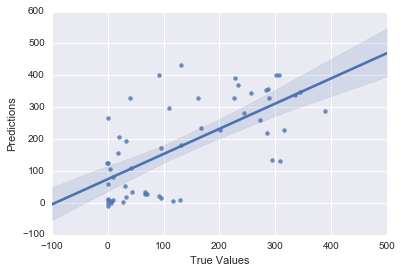

Mean Square Error: 1915.18
R2 value for Lasso: 0.310849


In [749]:
from sklearn import linear_model
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score


X_QB = resultQB[['Total_Yards','Total_TD','Total_Yards_perComp']]
y_QB = resultQB[['FPTs']]

X_QB = X_QB.convert_objects(convert_numeric=True)
y_QB = y_QB.convert_objects(convert_numeric=True)


X_QB.replace([np.inf, -np.inf], np.nan,inplace=True)
y_QB = y_QB.drop(y_QB.index[[-1]])
X_QB.dropna(inplace=True)


#Building a model using the train sets and test sets
lm = linear_model.LinearRegression()

model = lm.fit(X_QB, y_QB)
predictions = lm.predict(X_QB)
target = resultQB[['total_points']].astype(float)
target = target.drop(target.index[[-1]])

## The line / model
plt.scatter(target,predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
#print "Score:", model.score(X_QB, target)  
print("Mean Square Error: %.2f" % np.mean(((predictions - target) ** 2)/len(X_QB)))
print "R2 value for Lin Reg: %f" % r2_score(predictions, target) 

ll = linear_model.LassoCV(alphas=[0.01, 1, 100]).fit(X_QB,y_QB)

predictions1 = ll.predict(X_QB)

sns.regplot(target,predictions1)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Mean Square Error: %.2f" % np.mean((([predictions1] - target) ** 2)/len(predictions1)))
print "R2 value for Lasso: %f" % r2_score(predictions1, target) 
#use the 2015 results and try it on the model

#use a diff method to model it

Best score: 78.0547413298
Best depth: 8


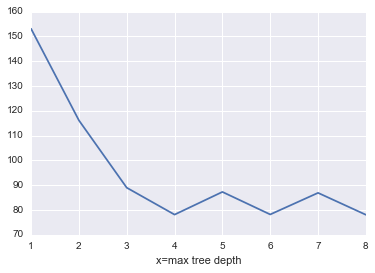

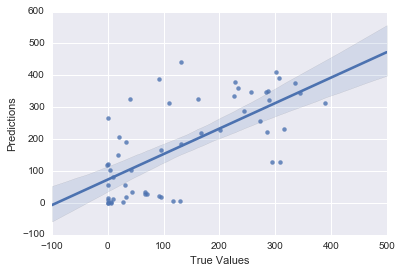

R2 value for decision tree: 0.323211


In [750]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import KFold, cross_val_score

all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 9):
    treereg = DecisionTreeRegressor(max_depth=i)
    scores = cross_val_score(treereg, X_QB, y_QB, cv=3, n_jobs = -1, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treereg = DecisionTreeRegressor(max_depth=best_depth)
#X_train, X_test, y_train, y_test = train_test_split(X_QB, y_QB, test_size=0.3)
treereg.fit(X_QB, y_QB)

plt.figure()
plt.plot(range(1, 9), all_scores)
plt.xlabel('x=max tree depth')
plt.show()

preds = treereg.predict(X_QB)

sns.regplot(target,preds)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
print "R2 value for decision tree: %f" % r2_score(preds, target) 


/Users/SangYeob/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/SangYeob/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/SangYeob/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
/Users/SangYeob/anaconda/lib/python2.7/site-packages/ipyker

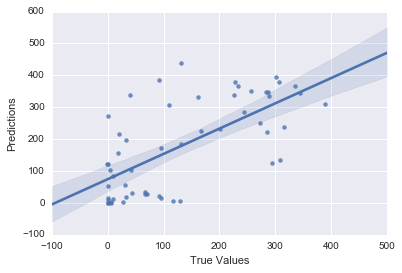

R2 value for Random Forest: 0.312788


In [751]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
rf = RandomForestRegressor()
rfScore = cross_val_score(rf,X_QB,y_QB,cv=3,verbose=True,n_jobs=-1)
rf.fit(X_QB, y_QB)

preds_rf = rf.predict(X_QB)

sns.regplot(target,preds_rf)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
print "R2 value for Random Forest: %f" % r2_score(preds_rf, target) 

#print predictions, predictions1,preds,preds_rf

The reason that the R^2 values are so good is because fantasy points are derived from the stats. You can also see that from the heatmap that they have strong positive relationship between fantasy points and yards/touchdowns. I need to build different models and test it against 2015 results.


In [752]:
URLRB1 = "http://fftoday.com/stats/playerstats.php?Season=2014&GameWeek=Season&PosID=20&LeagueID=0"
URLRB2 = "http://fftoday.com/stats/playerstats.php?Season=2014&GameWeek=Season&PosID=20&LeagueID=1&order_by=FFPts&sort_order=DESC&cur_page=3"

#parse the page
soupRB1 = BeautifulSoup(requests.get(URLRB1).text)
soupRB2 = BeautifulSoup(requests.get(URLRB2).text)

RB1_data = [[i for i in soupRB1('table')[9].findAll('tr')[0]('tr')[i].text.split()[1:]] 
               for i in range(len(soupRB1('table')[9].findAll('tr')[0]('tr')))]
columnNames = ['First','Last','Team','Games', 'Att_Rush','Yards_Rush','TD_Rush','Target','RecNum','Yards_Rec','TD_Rec','FPTs','FPTs/G']


dfRB12014 = pd.DataFrame(RB1_data[2:],columns=columnNames)

dfRB12014['First'] = dfRB12014[[0,1]].apply(lambda x: ' '.join(x),axis=1)
del dfRB12014['Last']

RB2_data = [[i for i in soupRB2('table')[9].findAll('tr')[0]('tr')[i].text.split()[1:]] 
               for i in range(len(soupRB2('table')[9].findAll('tr')[0]('tr')))]

dfRB22014 = pd.DataFrame(RB2_data[2:],columns=columnNames)
dfRB22014['First'] = dfRB22014[[0,1]].apply(lambda x: ' '.join(x),axis=1)
del dfRB22014['Last']

dfRB2014 = pd.concat([dfRB12014,dfRB22014])
dfRB2014.rename(columns={'First': 'Player'}, inplace=True)
dfRB2014['Yards_Rush'] = dfRB2014['Yards_Rush'].str.replace(',','')

#convert objects into numeric(integers or floats)
dfRB2014 = dfRB2014.convert_objects(convert_numeric=True)

dfRB2014.head()

/Users/SangYeob/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Player,Team,Games,Att_Rush,Yards_Rush,TD_Rush,Target,RecNum,Yards_Rec,TD_Rec,FPTs,FPTs/G
0,DeMarco Murray,DAL,16,393,1845,13,64,57,416,0,304.1,19.0
1,Le'Veon Bell,PIT,16,290,1361,8,105,83,854,3,287.5,18.0
2,Marshawn Lynch,SEA,16,280,1306,13,48,37,367,4,269.3,16.8
3,Matt Forte,CHI,16,266,1038,6,130,102,808,4,244.6,15.3
4,Arian Foster,HOU,13,260,1246,8,59,38,327,5,235.3,18.1


In [753]:
dfRB2014.rename(columns={'Player': 'player'}, inplace=True)
resultRB = pd.merge(dfRB2014, somethingNew, on='player')
resultRB = resultRB.convert_objects(convert_numeric=True)
resultRB['Total_Yards'] = resultRB['Yards_Rush'] + resultRB['Yards_Rec']
resultRB['Total_TD'] = resultRB['TD_Rush'] + resultRB['TD_Rec']
resultRB['Att'] = resultRB['Att_Rush'] + resultRB['RecNum']
resultRB['Total_Yards_perComp'] = resultRB['Total_Yards'] / resultRB['Att']
resultRB.drop(['team','position','games_played','avg_points'],inplace=True,axis=1)
resultRB.head()

/Users/SangYeob/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


,player,Team,Games,Att_Rush,Yards_Rush,TD_Rush,Target,RecNum,Yards_Rec,TD_Rec,FPTs,FPTs/G,rank,total_points,Total_Yards,Total_TD,Att,Total_Yards_perComp
0,DeMarco Murray,DAL,16,393,1845,13,64,57,416,0,304.1,19.0,96,140.1,2261,13,450,5.024444
1,Le'Veon Bell,PIT,16,290,1361,8,105,83,854,3,287.5,18.0,198,87.2,2215,11,373,5.938338
2,Marshawn Lynch,SEA,16,280,1306,13,48,37,367,4,269.3,16.8,239,69.7,1673,17,317,5.277603
3,Matt Forte,CHI,16,266,1038,6,130,102,808,4,244.6,15.3,50,170.7,1846,10,368,5.016304
4,Arian Foster,HOU,13,260,1246,8,59,38,327,5,235.3,18.1,281,55.0,1573,13,298,5.278523


/Users/SangYeob/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/SangYeob/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


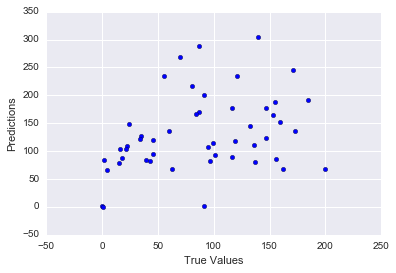

/Users/SangYeob/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Square Error: 128.04
R2 value: -0.500779


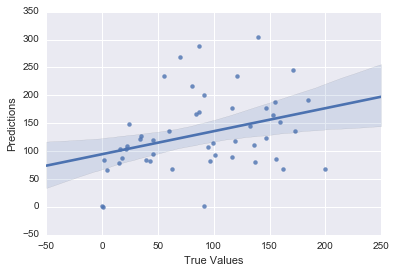

Mean Square Error: 1011.54
R2 value: -0.500746


In [754]:
X_RB = resultRB[['Total_Yards','Total_TD','Total_Yards_perComp']]
y_RB = resultRB[['FPTs']]

#X_RB = X_RB.convert_objects(convert_numeric=True)
#y_RB = y_RB.convert_objects(convert_numeric=True)

X_RB.replace([np.inf, -np.inf], np.nan,inplace=True)
y_RB = y_RB.drop(y_RB.index[[-1]])
y_RB = y_RB.drop(y_RB.index[[-1]])
X_RB.dropna(inplace=True)

#Building a model using the train sets and test sets
lm = linear_model.LinearRegression()

model = lm.fit(X_RB, y_RB)
predictions = lm.predict(X_RB)
target = resultRB[['total_points']].astype(float)
target = target.drop(target.index[[-1]])
target = target.drop(target.index[[-1]])

## The line / model
plt.scatter(target,predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
#print "Score:", model.score(X_QB, target)  
print("Mean Square Error: %.2f" % np.mean(((predictions - target) ** 2)/len(X_QB)))
print "R2 value: %f" % r2_score(predictions, target) 

ll = linear_model.LassoCV(alphas=[0.01, 1, 100]).fit(X_RB,y_RB)

predictions1 = ll.predict(X_RB)

sns.regplot(target,predictions1)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Mean Square Error: %.2f" % np.mean((([predictions1] - target) ** 2)/len(predictions1)))
print "R2 value: %f" % r2_score(predictions1, target) 
#use the 2015 results and try it on the model

#use a diff method to model it

Best score: 52.7482413171
Best depth: 7


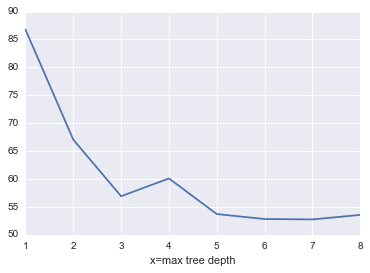

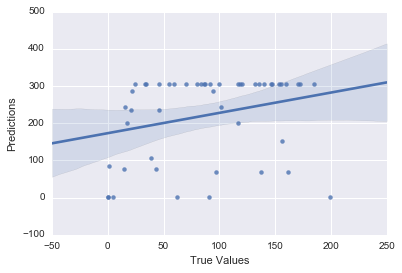

R2 value: -1.341796


In [755]:
all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 9):
    treereg = DecisionTreeRegressor(max_depth=i)
    scores = cross_val_score(treereg, X_RB, y_RB, cv=3, n_jobs = -1, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treereg = DecisionTreeRegressor(max_depth=best_depth)
#X_train, X_test, y_train, y_test = train_test_split(X_QB, y_QB, test_size=0.3)
treereg.fit(X_RB, y_RB)

plt.figure()
plt.plot(range(1, 9), all_scores)
plt.xlabel('x=max tree depth')
plt.show()

preds = treereg.predict(X_QB)

sns.regplot(target,preds[:49])
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
print "R2 value: %f" % r2_score(preds[:49], target) 


/Users/SangYeob/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/SangYeob/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/SangYeob/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
/Users/SangYeob/anaconda/lib/python2.7/site-packages/ipyker

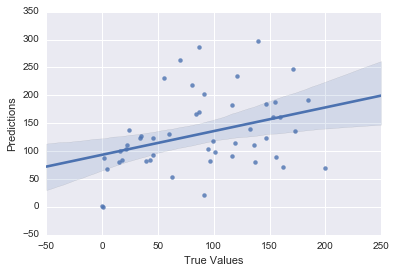

R2 value: -0.501478


In [756]:
rf = RandomForestRegressor()
rfScore = cross_val_score(rf,X_RB,y_RB,cv=3,verbose=True,n_jobs=-1)
rf.fit(X_RB, y_RB)

preds_rf = rf.predict(X_RB)

sns.regplot(target,preds_rf)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()
print "R2 value: %f" % r2_score(preds_rf, target) 

The R-squared values for all the models that I have tested on the quarter backs and running backs tell me that the stats from previous years cannot predict better than the expert's preseason predictions. There are a lot more factors than purely stats that contribute to the fantasy points at the end of the season. To make a better model, I need to investigate further into how experts are coming up with their predictions, and include other features such as team ranking injuries,and other stats.

Since my own models were not successful, I will use the expert predictions to cluster players into tiers to recommend who you should draft.

In [757]:
finalFrame['fantasy_points'] = finalFrame['fantasy_points'].astype(float)
finalFrame.sort_values(by='fantasy_points',axis=0,ascending=False,inplace=True)
finalFrame.reset_index(inplace=True,drop=True)
#finalFrame.drop(['index'],axis=1,inplace=True)
finalFrame.head(20)


,player,team,postion,fantasy_points
0,Andrew Luck,IND,QB,329.6
1,Aaron Rodgers,GB,QB,325.2
2,Russell Wilson,SEA,QB,303.2
3,Peyton Manning,FA,QB,298.0
4,Drew Brees,NO,QB,295.6
5,Tom Brady,NE,QB,281.2
6,Cam Newton,CAR,QB,278.9
7,Matt Ryan,ATL,QB,278.8
8,Tony Romo,DAL,QB,272.9
9,Matthew Stafford,DET,QB,271.3


Estimated number of clusters: 4


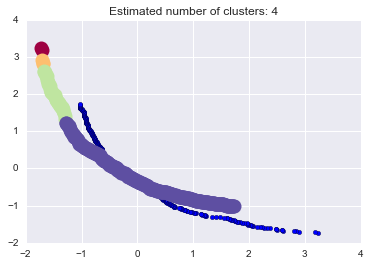

There are sufficient number of clusters, but not all data points are included. Therefore, I must use a different
clustering algorithm.


In [758]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

finalFrame['Rank'] = finalFrame.index + 1

data = finalFrame[['Rank','fantasy_points']]
data = data.as_matrix().astype("float32", copy = False)

stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)

dataDF = pd.DataFrame(data)
plt.scatter(dataDF[1],dataDF[0])

dbsc = DBSCAN(eps = .1, min_samples =1).fit(data)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
clusters = [data[labels == i] for i in xrange(n_clusters_)]

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = data[class_member_mask & ~core_samples]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

print "DBSCAN does not give a sufficient number of clusters since the points are so close to each other."

In [759]:
finalFrame.head()

,player,team,postion,fantasy_points,Rank
0,Andrew Luck,IND,QB,329.6,1
1,Aaron Rodgers,GB,QB,325.2,2
2,Russell Wilson,SEA,QB,303.2,3
3,Peyton Manning,FA,QB,298.0,4
4,Drew Brees,NO,QB,295.6,5


In [820]:
from sklearn.cluster import KMeans
import numpy as np
kmeansDF = finalFrame.iloc[:,3:]
kmean = KMeans(n_clusters=100, random_state=10) 

kmean.fit(kmeansDF)

clusters = {}
n = 0
for item in kmean.labels_:
    if item in clusters:
        clusters[item].append(finalFrame.iloc[n,:])
    else:
        clusters[item] = [finalFrame.iloc[n,:]]
    n +=1

recomList = []
clusterList = []
for item in clusters:
    #print "Cluster ", item
    for i in clusters[item]:
        clusterList.append(item)
        recomList.append(i)

recomDF = pd.DataFrame(recomList)
recomDF['cluster'] = clusterList
recomDF['fantasy_points'] = recomDF['fantasy_points'].astype(float)
#print recomDF
#recomDF = recomDF.groupby(['cluster','player']).mean()
#recomDF.sort(['fantasy_points'], ascending=False, inplace=True)
fantasyP = recomDF['fantasy_points'].groupby(recomDF['cluster']).mean()
#print len(fantasyP)

mydict = {}
for x in range(len(recomDF)):
    currentcluster = recomDF.iloc[x,5]
    currentvalue = recomDF.iloc[x,[0,2]]
    mydict.setdefault(currentcluster, [])
    mydict[currentcluster].append(currentvalue)

dictDF = pd.DataFrame([[key,value] for key,value in mydict.items()],columns=["cluster","player"])
dictDF['fantasy_points'] = fantasyP

qbList = []
rbList = []
teList = []
wrList = []
kList = []
for i in dictDF.player:
    qbList.append([y[0] for y in i if y[1] == 'QB'])
    rbList.append([y[0] for y in i if y[1] == 'RB'])
    wrList.append([y[0] for y in i if y[1] == 'WR'])
    teList.append([y[0] for y in i if y[1] == 'TE'])
    kList.append([y[0] for y in i if y[1] == 'K'])

In [828]:
dictDF.sort_values(by='fantasy_points',axis=0,ascending=False,inplace=True)
print dictDF
print "I have no idea why this doesn't work. The exact same code worked an hour ago."

    cluster                                             player  fantasy_points
19       19  [[Melvin Gordon, RB], [Arian Foster, RB], [Lat...      327.400000
29       29                              [[Bishop Sankey, RB]]      298.933333
49       49  [[Jared Cook, TE], [Charles Clay, TE], [Lorenz...      278.900000
8         8  [[Larry Donnell, TE], [Denard Robinson, RB], [...      278.800000
26       26  [[Josh Robinson, RB], [Damien Williams, RB], [...      253.100000
43       43  [[Anthony Fasano, TE], [Bobby Rainey, RB], [Jo...      246.800000
35       35  [[Scott Chandler, TE], [Virgil Green, TE], [Rh...      230.700000
1         1  [[Ryan Succop, K], [Delanie Walker, TE], [Dway...      230.500000
48       48            [[Tyrod Taylor, QB], [Jeremy Hill, RB]]      220.025000
16       16  [[Johnny Manziel, QB], [Craig Stevens, TE], [M...      206.466667
32       32  [[Dan Carpenter, K], [Brandon McManus, K], [Ch...      204.450000
47       47  [[Ryan Mallett, QB], [David Johnson, RB

I was too tired by this point, but the data frame aboves gives recommendations for each rounds of fantasy draft. If a player runs out in the first rank, then you should pick players from the next rank. If you look at the players, there seems to be some anomalies in draft recommendations. This is possibly due to the way the data is clustered. K means is best for hyper spherical data whereas the data that I feed into K-means clustering algorithm is not hyper-spherical. I need to look into a different means of clustering to best group the players. Then, I will compare the draft recommendations to the actual results from the 2015 season.

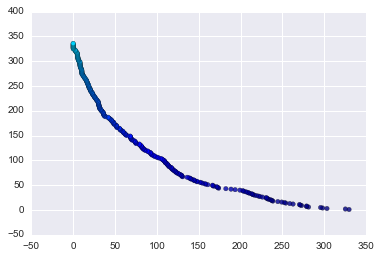

In [823]:
from sklearn import mixture
from pylab import *

samples = finalFrame.iloc[:,3:]
gmix = mixture.GMM(n_components=50, covariance_type='full')
gmix.fit(samples)
#print gmix.means_
tiers = gmix.predict(samples)
#colors = ['r' if i==0 else 'g' for i in gmix.predict(samples)]
ax = plt.gca()

from matplotlib import cm
from numpy import linspace

start = 0.0
stop = 1.0
number_of_lines= 1000
cm_subsection = linspace(start, stop, number_of_lines) 

colors = [ cm.jet(x) for x in cm_subsection ]
ax.scatter(samples.iloc[:,0], samples.iloc[:,1], c=colors, alpha=0.8)
plt.show()


In [829]:
GaussDF = finalFrame
#GaussDF.drop('Rank',axis=1,inplace=True)
GaussDF['Tier'] = tiers
fantasyP2 = GaussDF['fantasy_points'].groupby(GaussDF['Tier']).mean()

mydict2 = {}
for x in range(len(GaussDF)):
    currentTier = GaussDF.iloc[x,5]
    currentvalue = GaussDF.iloc[x,[0,2]]
    mydict2.setdefault(currentTier, [])
    mydict2[currentTier].append(currentvalue)


dictDF2 = pd.DataFrame([[key,value] for key,value in mydict2.items()],columns=["Tier","player"])
dictDF2['fantasy_points'] = [x for x in fantasyP2 if x != np.nan]
dictDF2.sort_values(by='fantasy_points',axis=0,ascending=False,inplace=True)
print dictDF2
print "This is my final draft recommendation. The players in the same tier should be worth the same. For example,"
print "Andrew Luck from the Tier 19 should perform similar to Aaron Rodgers. If a player picks Andrew Luck as their"
print "first pick, you can pick Aaron Rodgers since they are supposed to perform similarly."

    Tier                                             player  fantasy_points
19    19  [[Andrew Luck, QB], [Aaron Rodgers, QB], [Russ...      305.466667
25    25  [[Matt Ryan, QB], [Tony Romo, QB], [Matthew St...      257.566667
7      7  [[Teddy Bridgewater, QB], [Sam Bradford, QB], ...      227.370000
46    48  [[Cam Newton, QB], [Alex Smith, QB], [C.J. And...      213.480000
21    21  [[Matt Forte, RB], [Antonio Brown, WR], [Nick ...      209.240000
29    29  [[Demaryius Thomas, WR], [Blake Bortles, QB], ...      206.366667
20    20            [[Tyrod Taylor, QB], [Jeremy Hill, RB]]      196.350000
3      3            [[LeSean McCoy, RB], [Carlos Hyde, RB]]      173.100000
34    34  [[Josh McCown, QB], [Lamar Miller, RB], [Mark ...      170.242857
37    38  [[Frank Gore, RB], [LeGarrette Blount, RB], [A...      153.080000
14    14                           [[Ryan Fitzpatrick, QB]]      144.800000
39    41  [[Andre Ellington, RB], [Chris Ivory, RB], [St...      141.625000
17    17  [[

# Executive Summary

The goal of this project is to provide recommendations for your NFL fantasy league. My initial idea was to scrap data from a website that gives each NFL offensive player's statistics from 2014 and use that data to come up with best predictive model to pick the best players. The success criteria of the model is to have a better R^2 value than the expert's projections. The expert's projections were scraped from fantasypros.com. The R^2 value from the experts compared to the actual results was 0.6. Therefore, I needed to come up with a model that gives better R^2 value than 0.6. The models that I tried was linear regression, Lasso linear regression, Decision Tree Regressor with optimized depth, and Random Forest Regressor. However, the R^2 value for the QB position and RB position was significantly weaker than the expert's projection. The shortcomings from the model comes from less lack variety in the features. There are more factors that will affect the player's performance in the next season. Therefore, it is safe to conclude that the previous year's performances cannot predict better results on player's performance on next year's season. Next steps that I took was to take the projections made by the experts and cluster them into ranks or tiers. The idea was to group players with similar qualities into ranks or tiers. Since the draft order is sequential for league players, it is easier to distinguish whether one player predicted to perform similarly to other players. I used three clustering algorithms: DBSCAN, K-Means, and Gaussian Mixture Model. DBSCAN did not perform very well since all the points were so close to each other. K-Means clustering did not work well since the type of data that I had was not hyper-spherical. Gaussian Mixture Model successfully grouped these players into tiers of similar qualities. In order to improve my original predictive models, I need to have different features such as team ranking, injuries, and research other unknown features that might be impactful. More research and analysis on how other experts predict the next year's performances in order to select the best features for the model. For the clustering algorithms, having more features would cluster them into groups more evenly. Splitting the clustering by different positions would provide a nice insight on how you should draft players as well.

MG:

Part 2 Score |  22/21
-------|-----
Identify: Articulate Problem Statement/Specific goals & success criteria        |        3
Identify: Outline proposed methods & models        | 3 
Parse: Identify risks & assumptions                | 3
Parse: Create local PostgreSQL database            | 3
Parse: Query, Sort, & Clean Data                | 3
Parse: Create a Data Dictionary                | 3
Mine: Perform & summarize EDA                | 3
Bonus! Refine: Explain how you intend to tune & evaluate your results | 1

Part 3 Score |  12/15
-------|-----
Mine: Correlate data & run statistical analysis        | 3
Refine: Plot data w visual analysis                | 3
Model: Run model on data (train subset as needed)            | 2
Present: Summarize approach & initial results                | 2
Present: Describe successes, setbacks, & lessons learned  | 2
Bonus: Use 2 or more dataviz tools | 0

In [ ]:
GaussDF